In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

# Read directly from the URL
df = pd.read_csv(url)

print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (1462, 9)


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [2]:
# Save a local copy (optional)
df.to_csv("course_lead_scoring.csv", index=False)

print("File saved as course_lead_scoring.csv in your Codespace working directory.")

File saved as course_lead_scoring.csv in your Codespace working directory.


In [3]:
import os
os.listdir()

['CarPricePrediction.ipynb',
 'Predict_test.ipynb',
 'data.csv',
 'README.md',
 'Pipfile',
 'Pipfile.lock',
 'ping.py',
 '.git',
 '.gitignore',
 'EvaluationMetrics.ipynb',
 'Numpy.ipynb',
 'Pandas.ipynb',
 'data.csv.1',
 'predict_test.py',
 'train.py',
 'course_lead_scoring.csv',
 'Homework3.ipynb',
 'ChurnPrediction.ipynb',
 'Dockerfile',
 'app',
 'data-week-3.csv',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'Homework2.ipynb',
 'model_C=1.0.bin',
 'LinearRegresion.ipynb',
 '__pycache__',
 'predict.py',
 '.vscode',
 'Homework1.ipynb',
 'ChurnPredDeployModel.ipynb']

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# show working dir
print("Working directory:", os.getcwd())

Working directory: /workspaces/machine-learning-zoomcamp-homework


In [6]:
# Check how many missing values each column has
missing = df.isnull().sum()

# Show only the columns that actually have missing values
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
lead_source          128
industry             134
annual_income        181
employment_status    100
location              63
dtype: int64


In [7]:
# Identify numerical and categorical columns automatically
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']
Categorical columns: ['lead_source', 'industry', 'employment_status', 'location']


In [9]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [10]:
# Fill missing numeric values with 0.0
df[num_cols] = df[num_cols].fillna(0.0)

# Fill missing categorical values with 'NA'
df[cat_cols] = df[cat_cols].fillna('NA')

In [11]:
# Double-check that no missing values remain
print("Total remaining missing values:", df.isnull().sum().sum())

Total remaining missing values: 0


In [12]:
# Step 1: Split off 20% of data as the test set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Step 2: From the remaining 80%, split 25% as validation (0.25 * 0.8 = 0.2 total)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Check the resulting proportions
print("Train size:", len(df_train))
print("Validation size:", len(df_val))
print("Test size:", len(df_test))

Train size: 876
Validation size: 293
Test size: 293


In [13]:
#Verify proportions add up
total = len(df)
print("Proportions:", 
      round(len(df_train)/total, 2), 
      round(len(df_val)/total, 2), 
      round(len(df_test)/total, 2))


Proportions: 0.6 0.2 0.2


In [14]:
# converted — target var; four numeric variables. Compute AUC for each.
# Define target
y_train = df_train['converted']

# Define list of numeric features to test
features = ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']

In [15]:


aucs = {}

for feature in features:
    scores = df_train[feature]
    auc = roc_auc_score(y_train, scores)
    
    # If AUC < 0.5, invert (negate) the variable to make correlation positive
    if auc < 0.5:
        auc = roc_auc_score(y_train, -scores)
        print(f"{feature}: AUC below 0.5 originally, inverted it.")
        
    aucs[feature] = auc
    print(f"{feature}: AUC = {auc:.4f}")

# Sort results
sorted_aucs = sorted(aucs.items(), key=lambda x: x[1], reverse=True)

print("\nFeature ranking by AUC:")
for name, score in sorted_aucs:
    print(f"{name}: {score:.4f}")

lead_score: AUC = 0.6145
number_of_courses_viewed: AUC = 0.7636
interaction_count: AUC = 0.7383
annual_income: AUC = 0.5520

Feature ranking by AUC:
number_of_courses_viewed: 0.7636
interaction_count: 0.7383
lead_score: 0.6145
annual_income: 0.5520


In [16]:
# For each feature, we treat its numeric value as a score predicting whether someone converted (1).
# We measure how well that single feature alone can separate converters from non-converters using roc_auc_score.
# If AUC < 0.5, that means the correlation is negative — flipping (negating) the sign fixes that.
# The feature with the highest AUC is considered the most predictive among those four.

In [17]:
# Target variable
y_train = df_train['converted']
y_val = df_val['converted']

# Drop target column from features
X_train = df_train.drop('converted', axis=1)
X_val = df_val.drop('converted', axis=1)

# List categorical features
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Convert each row to a dictionary
train_dicts = X_train[cat_features + ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']].to_dict(orient='records')
val_dicts = X_val[cat_features + ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']].to_dict(orient='records')

In [18]:
cat_features

['lead_source', 'industry', 'employment_status', 'location']

In [20]:
# Apply DictVectorizer
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)

In [21]:
# Train Logistic Regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Evaluate using ROC AUC on validation set
y_pred = model.predict_proba(X_val_encoded)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("Validation AUC:", round(auc, 3))

Validation AUC: 0.817


In [23]:
# Compute precision and recall for our model, meaning get probabilities that someone will convert.
# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them

In [24]:
# Get predicted probabilities for validation set
# This gives a number between 0 and 1 for each person (the higher, the more likely they convert).
y_pred = model.predict_proba(X_val_encoded)[:, 1]

In [25]:
# Try different thresholds, loop through thresholds (like 0.0, 0.01, 0.02, …, 1.0).
# At each threshold, we decide: If probability ≥ threshold → predict 1 (yes)
#                               If probability < threshold → predict 0 (no)
#                               Then compute precision and recall.
precisions = []
recalls = []
thresholds = np.arange(0.0, 1.01, 0.01)

for t in thresholds:
    y_pred_label = (y_pred >= t).astype(int)
    p = precision_score(y_val, y_pred_label)
    r = recall_score(y_val, y_pred_label)
    precisions.append(p)
    recalls.append(r)

/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


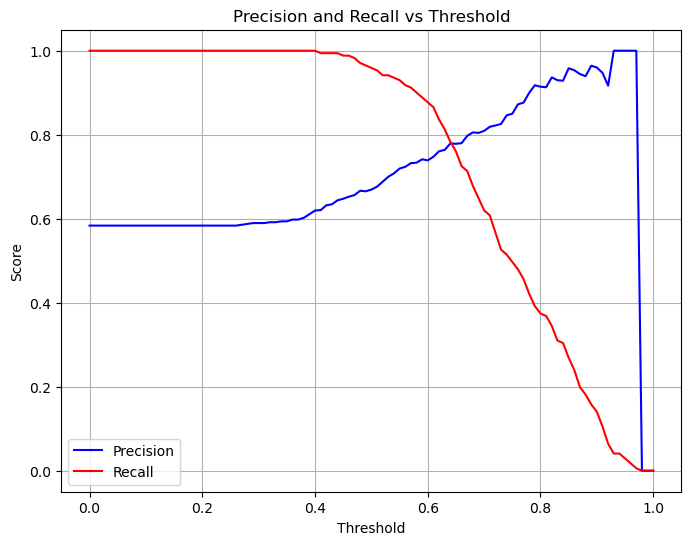

In [26]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Find the point where the two curves are closest to each other.
diff = np.abs(np.array(precisions) - np.array(recalls))
best_idx = diff.argmin()
best_threshold = thresholds[best_idx]

print("Precision and Recall intersect at threshold:", round(best_threshold, 3))

Precision and Recall intersect at threshold: 0.98


In [28]:
# Compute F1 for all thresholds
f1_scores = []

for p, r in zip(precisions, recalls):
    if (p + r) == 0:
        f1 = 0
    else:
        f1 = 2 * p * r / (p + r)
    f1_scores.append(f1)

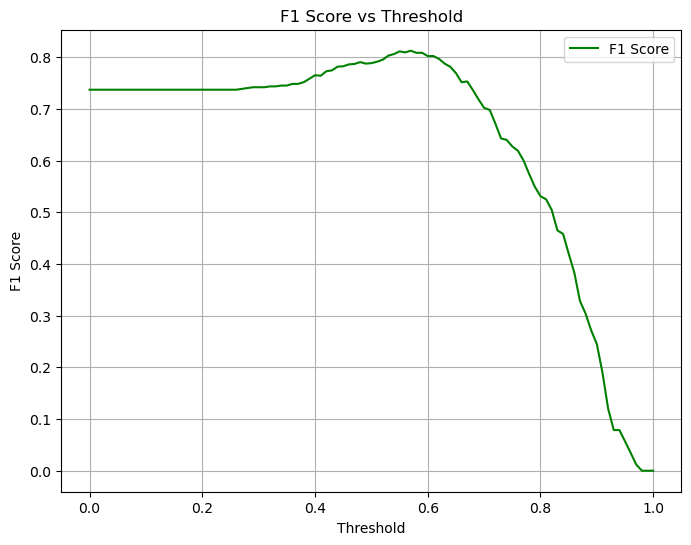

In [29]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Find the threshold where F1 is the highest
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best F1 threshold:", round(best_threshold, 3))
print("Max F1 Score:", round(f1_scores[best_idx], 3))

Best F1 threshold: 0.57
Max F1 Score: 0.812


In [31]:
# Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
# KFold(n_splits=5, shuffle=True, random_state=1)
# Iterate over different folds of df_full_train
# Split the data into train and validation
# Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# Use AUC to evaluate the model on validation
# How large is standard deviation of the scores across different folds?

In [32]:
# Split target and features
y_full = df_full_train.converted
X_full = df_full_train.drop('converted', axis=1)

In [33]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [34]:
# Loop through each fold. We’ll train a new logistic regression model each time.
scores = []

for train_idx, val_idx in kfold.split(X_full):
    # Split data into train and validation
    df_train = X_full.iloc[train_idx]
    df_val = X_full.iloc[val_idx]
    y_train = y_full.iloc[train_idx]
    y_val = y_full.iloc[val_idx]
    
    # Turn them into dictionaries
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    
    # One-hot encode
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)
    
    # Train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred = model.predict_proba(X_val)[:, 1]
    
    # Compute AUC
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

# Show all scores
print("AUC scores:", scores)

AUC scores: [0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]


In [35]:
print("Mean AUC:", round(np.mean(scores), 3))
print("STD AUC:", round(np.std(scores), 3))

Mean AUC: 0.822
STD AUC: 0.036


In [36]:
# Hyperparameter Tuning
# Now let's use 5-Fold cross-validation to find the best parameter C
# Iterate over the following C values: [0.000001, 0.001, 1]
# Initialize KFold with the same parameters as previously
# Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
# Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
# Which C leads to the best mean score?

In [37]:
# What is “C” in Logistic Regression?
# C controls how much the model tries to fit the data:
# Small C (like 0.000001) → model is very simple (lots of regularization)
# Big C (like 1) → model is more flexible, fits data better, but might overfit
# We’ll test different C values and see which gives the best AUC score on average.

In [38]:
# Prepare data
y_full = df_full_train.converted
X_full = df_full_train.drop('converted', axis=1)

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [41]:
C_values = [0.000001, 0.001, 1]
results = {}

for C in C_values:
    scores = []
    for train_idx, val_idx in kfold.split(X_full):
        df_train = X_full.iloc[train_idx]
        df_val = X_full.iloc[val_idx]
        y_train = y_full.iloc[train_idx]
        y_val = y_full.iloc[val_idx]

        train_dicts = df_train.to_dict(orient='records')
        val_dicts = df_val.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)
        X_val = dv.transform(val_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    results[C] = (round(np.mean(scores), 3), round(np.std(scores), 3))

In [42]:
for C, (mean_score, std_score) in results.items():
    print(f"C={C}: mean={mean_score}, std={std_score}")

C=1e-06: mean=0.56, std=0.024
C=0.001: mean=0.867, std=0.029
C=1: mean=0.822, std=0.036


In [43]:
# Convert results dictionary into a DataFrame
results_df = pd.DataFrame([
    {'C': C, 'Mean AUC': mean, 'Std AUC': std}
    for C, (mean, std) in results.items()
])

# Sort results by Mean AUC (best on top)
results_df = results_df.sort_values(by='Mean AUC', ascending=False).reset_index(drop=True)

results_df

,C,Mean AUC,Std AUC
0,0.001000,0.867,0.029
1,1.000000,0.822,0.036
2,0.000001,0.560,0.024


In [44]:
best_C = results_df.iloc[0]['C']
print(f"✅ Best C value: {best_C}")

✅ Best C value: 0.001
